# Text Mining Twitter Analysis

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

 # API Connection

In [2]:
 !pip install tweepy

     |████████████████████████████████| 153kB 13.4MB/s 


In [3]:
import tweepy, codecs



consumer_key = '5ecrgpF8KDhSZlvM8o0xSASVh'
consumer_secret = '5MdKdPRMpgGylXBZUlHXPwnxsgwjczusIeYw1JMTUUGQ0Dcdpi'
access_token = '330297491-56WABQRvTJnWTLG7bMnJT27Jlt9T5TYwUPiTR7hh'
access_token_secret = 'aCmW6YbiBjIycroI5zmoXGgpsnN46P5rXbCfx69KmRBMt'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [4]:
# we can tweet with this code
# api.update_status('hello from python')

In [5]:
# we can see our friends on twitter with this code
#api.friends()

# Pull data from Twitter 

In [6]:
fk = api.me()

In [7]:
# you can follow me :)
fk.screen_name

'fatmaakursun'

In [8]:
fk.followers_count

191

In [9]:
#fk.friends

In [10]:
for friend in fk.friends(count=10):
    print(friend.screen_name)

Emre_buTCher
cleverqazi
lexfridman
Twitter
TheRealRyanHiga
feyyazyigit
englishtesting
SalimJabbour2
LOOKOUTBrighton
billieeilish


In [11]:
dir(fk)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'contributors_enabled',
 'created_at',
 'default_profile',
 'default_profile_image',
 'description',
 'entities',
 'favourites_count',
 'follow',
 'follow_request_sent',
 'followers',
 'followers_count',
 'followers_ids',
 'following',
 'friends',
 'friends_count',
 'geo_enabled',
 'has_extended_profile',
 'id',
 'id_str',
 'is_translation_enabled',
 'is_translator',
 'lang',
 'listed_count',
 'lists',
 'lists_memberships',
 'lists_subscriptions',
 'location',
 'name',
 'needs_phone_verification',
 'notifications',
 'parse',
 'parse_list',
 'profile_background_color',
 'profile_backgrou

In [12]:
user = api.get_user(id = 'bsrakrsn')

In [13]:
user.screen_name

'bsrakrsn'

In [14]:
user.followers_count

202

In [15]:
user.profile_image_url

'http://pbs.twimg.com/profile_images/1119183910230011904/a-xENa0o_normal.jpg'

## home timeline

In [16]:
public_tweets = api.home_timeline(count=10)

In [17]:
for tweet in public_tweets:
    print(tweet.text)

The long list of vacancies and scramble to bring in expertise fit a pattern of neglect in the Trump Administration’… https://t.co/hutSqZx7Yr
The highest-ranking officer in the US Marine Corps has ordered Confederate-related paraphernalia to be removed from… https://t.co/m01Goiklia
Science has documented many biofluorescent animals including chameleons, corals, jellyfish, reef fish, sharks, scor… https://t.co/rtYGurmhIW
İnternet neden yavaşladı, sosyal medyaya niye erişilemiyor? 

https://t.co/n5tbQA9K2H
Simulating epidemics using Go and Python by @sausheong  https://t.co/geHH7qSe9F
Hey #NorDevCon2020! Save 40% on #csharp, #agile, #javascript, #AWS, and other books and videos with CODE ctwndcon20… https://t.co/68hGnzgPVy
Border Force officers are the front line in protecting the country. Watch the video to find out how they’re disrupt… https://t.co/YqmmTYwLSc
Diyanet'ten Cuma hutbesi: Hak uğruna mücadelemiz, birlik beraberlik ruhumuz https://t.co/B1onbWzq5D https://t.co/L8L5kLaSDu
RT @Q

## user time line 

In [18]:
name = 'AndrewYNg'
tweet_count = 10

user_timeline = api.user_timeline(id = name, count=tweet_count)

for i in user_timeline:
    print(i.text)

Chatting with @lexfridman about ML, rise of MOOCs, what’s hard in learning AI, ... was the most fun interview I’ve… https://t.co/Kq3XDP30l1
Consumer internet companies with 1B+ users have popularized Big Data. But industries like manufacturing, agricultur… https://t.co/oBWEWaPU69
Happy multi-cultural palindrome day! Works whether your preferred date format is MM/DD/YYYY or DD/MM/YYYY or  YYYY/MM/DD.
Great chatting with @lexfridman. We talked about everything from the early mistakes I made building MOOCs to the ch… https://t.co/ksALj0InTq
Great having @EricTopol visit just now. His book Deep Medicine gives a compelling vision for AI in healthcare. We h… https://t.co/ylxKzpSNNM
RIP Professor Clayton Christensen. The world has lost a brilliant mind and a wonderful person, whose teachings on t… https://t.co/FmNhfeXur7
RT @RisingSayak: The latest @deeplearningai_ newsletter is just amazing. The part that I liked the most is the #ImageNet dataset is being m…
Many aspiring AI engineers ask me

## retweets

In [19]:
retweets = api.retweets_of_me(count=10)
for retweet in retweets:
    print(retweet.text)

In [20]:
retweets

[]

## hastag

In [21]:
results = api.search(q = '#datascience',
                    lang = 'tr',
                    result_type = 'recent',
                    count = 1000000 )

## convert to dataframe 

In [22]:
import pandas as pd

In [23]:
def tweets_df(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list,columns=['id'])
    
    
    data_set['text'] = [tweet.text for tweet in results]
    data_set['created_at'] = [tweet.created_at for tweet in results]
    data_set['retweet_count'] = [tweet.retweet_count for tweet in results]
    data_set['name'] = [tweet.author.name for tweet in results]
    data_set['user_screen_name'] = [tweet.author.screen_name for tweet in results]
    data_set['user_followers_count'] = [tweet.author.followers_count for tweet in results]
    data_set['user_location'] = [tweet.author.location for tweet in results]
    data_set['Hashtags'] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set

In [24]:
data = tweets_df(results)

In [25]:
data.head()

,id,text,created_at,retweet_count,name,user_screen_name,user_followers_count,user_location,Hashtags
0,1233120996015661056,RT @emretunaayd: Türkiye'den tek yetkili platf...,2020-02-27 20:05:30,1,HrAnalitik.com,hranalitik,2,"İstanbul, Türkiye",[]
1,1232774466196955136,#veribilimi #datascience ile uğraşan arkadaşla...,2020-02-26 21:08:31,0,"Yalcin Parmaksiz, MBA, AMA PCM®",myparmaksiz,5282,N 40°23' 0'' / E 27°47' 0'',"[{'text': 'veribilimi', 'indices': [0, 11]}, {..."
2,1232735880932098050,This is necessary! 😂 \n\nNe kadar erken basla...,2020-02-26 18:35:11,0,S.Bayram,engineer702,91,"Newark,De","[{'text': 'datascientists', 'indices': [64, 79..."
3,1232640637910077443,RT @CansuUzunsimsek: Salı'lara anlam katan bir...,2020-02-26 12:16:44,6,HubofMachineLearning,hubofml,1834,Germany,"[{'text': 'DataScience', 'indices': [63, 75]},..."
4,1232640615353143298,RT @CansuUzunsimsek: Salı'lara anlam katan bir...,2020-02-26 12:16:38,6,Pınar Dağ FirthⓋ,pinardag,6367,"London, Zürich, İstanbul","[{'text': 'DataScience', 'indices': [63, 75]},..."


# Profile Analysis

In [26]:
AndrewNg = api.get_user('AndrewYNg')

In [27]:
AndrewNg.name

'Andrew Ng'

In [28]:
AndrewNg.id

216939636

In [29]:
AndrewNg.url

'https://t.co/XidcMETENd'

In [30]:
AndrewNg.verified

True

In [31]:
AndrewNg.screen_name

'AndrewYNg'

In [32]:
AndrewNg.statuses_count

1251

In [33]:
AndrewNg.favourites_count

896

In [34]:
AndrewNg.friends_count

441

In [35]:
tweets = api.user_timeline(id = 'AndrewYNg')

In [36]:
"""for i in tweets:
    print(i.text)"""

'for i in tweets:\n    print(i.text)'

In [37]:
def timeline_df(tweets):
    id_list = [tweet.id for tweet in tweets]
    data_set = pd.DataFrame(id_list,columns=['id'])
    
    
    data_set['text'] = [tweet.text for tweet in tweets]
    data_set['created_at'] = [tweet.created_at for tweet in tweets]
    data_set['retweet_count'] = [tweet.retweet_count for tweet in tweets]
    data_set['favorite_count'] = [tweet.favorite_count for tweet in tweets]
    data_set['source'] = [tweet.source for tweet in tweets]

    
    return data_set

In [38]:
timeline_df(tweets)

,id,text,created_at,retweet_count,favorite_count,source
0,1230930707557388289,"Chatting with @lexfridman about ML, rise of MO...",2020-02-21 19:02:04,307,1778,Twitter Web App
1,1227722012560384000,Consumer internet companies with 1B+ users hav...,2020-02-12 22:31:52,348,948,Twitter Web App
2,1224037549934383104,Happy multi-cultural palindrome day! Works whe...,2020-02-02 18:31:08,517,2452,Twitter Web App
3,1223344163682258944,Great chatting with @lexfridman. We talked abo...,2020-01-31 20:35:51,218,2858,Twitter Web App
4,1221969387042660353,Great having @EricTopol visit just now. His bo...,2020-01-28 01:32:59,98,794,Twitter Web App
5,1220826659303018496,RIP Professor Clayton Christensen. The world h...,2020-01-24 21:52:12,206,1047,Twitter Web App
6,1215362247456747520,RT @RisingSayak: The latest @deeplearningai_ n...,2020-01-09 19:58:34,62,0,Twitter Web App
7,1215047355126337538,Many aspiring AI engineers ask me how to take ...,2020-01-08 23:07:18,447,1603,Twitter Web App
8,1212502033804091392,"In The Batch's new year edition, @ylecun @kate...",2020-01-01 22:33:06,233,671,Twitter Web App
9,1212288286024065024,Happy New Decade! In the last decade AI went f...,2020-01-01 08:23:45,276,2432,Twitter for iPad


In [39]:
def timeline_df(tweets):
    df = pd.DataFrame()
    
    df['id'] = list(map(lambda tweet:tweet.id, tweets))
    df['created_at'] = list(map(lambda tweet:tweet.created_at, tweets))
    df['text'] = list(map(lambda tweet:tweet.text, tweets)) 
    df['favorite_count'] = list(map(lambda tweet:tweet.favorite_count, tweets))
    df['retweeted_count'] = list(map(lambda tweet:tweet.retweet_count, tweets))
    df['source'] = list(map(lambda tweet:tweet.source, tweets))
    return df

In [40]:
tweets = api.user_timeline(id = 'AndrewYNg',count=10000)

In [41]:
df = timeline_df(tweets)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
id                 200 non-null int64
created_at         200 non-null datetime64[ns]
text               200 non-null object
favorite_count     200 non-null int64
retweeted_count    200 non-null int64
source             200 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 9.5+ KB


In [43]:
df.sort_values('retweeted_count', ascending= False)

,id,created_at,text,favorite_count,retweeted_count,source
196,973781600751308800,2018-03-14 04:43:20,"Stephen Hawking once said, ""I'm not afraid of ...",14966,4279,Twitter Web Client
173,1006204761543081984,2018-06-11 16:01:24,"AI+ethics is important, but has been partly hi...",6364,2391,Twitter Web Client
34,1144668413140144128,2019-06-28 18:06:31,I’m glad DeepNude is dead. As a person and as ...,8035,1934,Twitter Web Client
144,1045399898537873408,2018-09-27 19:48:53,Deep Learning is getting really good on Big Da...,5052,1442,Twitter Web Client
77,1101150955389706243,2019-02-28 16:03:40,AI For Everyone is now available on @Coursera!...,4243,1409,Twitter Web Client
...,...,...,...,...,...,...
17,1207755422603464704,2019-12-19 20:11:46,The community has grown so much that we no lon...,121,3,Twitter Web App
188,988455729194389504,2018-04-23 16:33:05,@amritrp @CadeMetz Difference between AI vs. e...,16,2,Twitter Web Client
57,1113501712457793536,2019-04-03 18:01:10,@ruskin147 @BBCTechTent Great to see you and t...,13,2,Twitter for iPhone
85,1098273815690268672,2019-02-20 17:30:57,@kchonyc @honglaklee Thank you Kyunghyun! No n...,54,1,Twitter Web Client


In [44]:
df.sort_values('favorite_count', ascending= False)[['text', 'favorite_count']].iloc[0:3]

,text,favorite_count
196,"Stephen Hawking once said, ""I'm not afraid of ...",14966
83,"Announcing Nova Ng, our first daughter. Plus, ...",9578
34,I’m glad DeepNude is dead. As a person and as ...,8035


In [45]:
df.sort_values('favorite_count', ascending= False)['text'].iloc[0]

'Stephen Hawking once said, "I\'m not afraid of death, but I\'m in no hurry to die. I have so much I want to do first.… https://t.co/fDFfvPZX2l'

# Distribution of Retweet & Favorite Counts

In [46]:
df.head()

,id,created_at,text,favorite_count,retweeted_count,source
0,1230930707557388289,2020-02-21 19:02:04,"Chatting with @lexfridman about ML, rise of MO...",1778,307,Twitter Web App
1,1227722012560384000,2020-02-12 22:31:52,Consumer internet companies with 1B+ users hav...,948,348,Twitter Web App
2,1224037549934383104,2020-02-02 18:31:08,Happy multi-cultural palindrome day! Works whe...,2452,517,Twitter Web App
3,1223344163682258944,2020-01-31 20:35:51,Great chatting with @lexfridman. We talked abo...,2858,218,Twitter Web App
4,1221969387042660353,2020-01-28 01:32:59,Great having @EricTopol visit just now. His bo...,794,98,Twitter Web App


In [47]:
%config InlineBacend.figure_format = 'retina'
import seaborn as sns
import matplotlib.pyplot as plt

(-100, 15000)

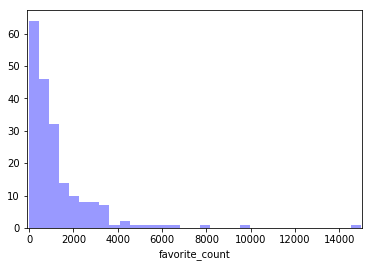

In [48]:
sns.distplot(df.favorite_count, kde=False ,color='blue')
plt.xlim(-100,15000)

(-100, 5000)

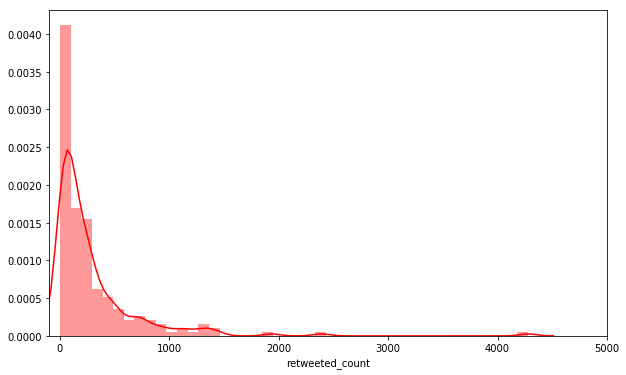

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(df.retweeted_count, color='red')
plt.xlim(-100,5000)

In [50]:
df['favorite_count'].mean()

1283.485

In [51]:
df['favorite_count'].std()

1738.4451233818259

## Distribution of Tweet-Hour  

In [52]:
df.head()

,id,created_at,text,favorite_count,retweeted_count,source
0,1230930707557388289,2020-02-21 19:02:04,"Chatting with @lexfridman about ML, rise of MO...",1778,307,Twitter Web App
1,1227722012560384000,2020-02-12 22:31:52,Consumer internet companies with 1B+ users hav...,948,348,Twitter Web App
2,1224037549934383104,2020-02-02 18:31:08,Happy multi-cultural palindrome day! Works whe...,2452,517,Twitter Web App
3,1223344163682258944,2020-01-31 20:35:51,Great chatting with @lexfridman. We talked abo...,2858,218,Twitter Web App
4,1221969387042660353,2020-01-28 01:32:59,Great having @EricTopol visit just now. His bo...,794,98,Twitter Web App


In [53]:
df['tweet_hour'] = df['created_at'].apply(lambda x: x.strftime('%H'))

In [54]:
df.head()

,id,created_at,text,favorite_count,retweeted_count,source,tweet_hour
0,1230930707557388289,2020-02-21 19:02:04,"Chatting with @lexfridman about ML, rise of MO...",1778,307,Twitter Web App,19
1,1227722012560384000,2020-02-12 22:31:52,Consumer internet companies with 1B+ users hav...,948,348,Twitter Web App,22
2,1224037549934383104,2020-02-02 18:31:08,Happy multi-cultural palindrome day! Works whe...,2452,517,Twitter Web App,18
3,1223344163682258944,2020-01-31 20:35:51,Great chatting with @lexfridman. We talked abo...,2858,218,Twitter Web App,20
4,1221969387042660353,2020-01-28 01:32:59,Great having @EricTopol visit just now. His bo...,794,98,Twitter Web App,01


In [55]:
df['tweet_hour'] = pd.to_numeric(df['tweet_hour'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
id                 200 non-null int64
created_at         200 non-null datetime64[ns]
text               200 non-null object
favorite_count     200 non-null int64
retweeted_count    200 non-null int64
source             200 non-null object
tweet_hour         200 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 11.1+ KB


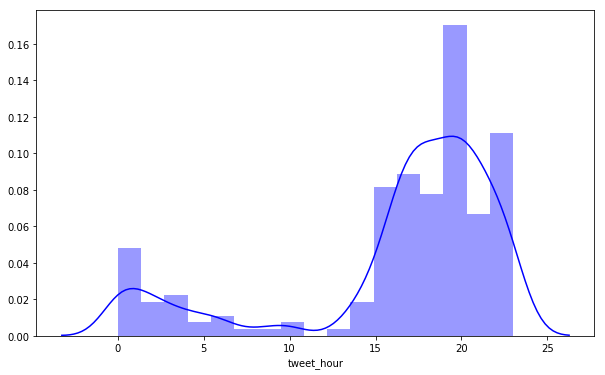

In [57]:
plt.figure(figsize=(10,6))
sns.distplot(df['tweet_hour'], kde=True, color='blue')

In [58]:
df['days'] = df['created_at'].dt.weekday_name

In [59]:
df.head()

,id,created_at,text,favorite_count,retweeted_count,source,tweet_hour,days
0,1230930707557388289,2020-02-21 19:02:04,"Chatting with @lexfridman about ML, rise of MO...",1778,307,Twitter Web App,19,Friday
1,1227722012560384000,2020-02-12 22:31:52,Consumer internet companies with 1B+ users hav...,948,348,Twitter Web App,22,Wednesday
2,1224037549934383104,2020-02-02 18:31:08,Happy multi-cultural palindrome day! Works whe...,2452,517,Twitter Web App,18,Sunday
3,1223344163682258944,2020-01-31 20:35:51,Great chatting with @lexfridman. We talked abo...,2858,218,Twitter Web App,20,Friday
4,1221969387042660353,2020-01-28 01:32:59,Great having @EricTopol visit just now. His bo...,794,98,Twitter Web App,1,Tuesday


In [60]:
gun_freq = df.groupby('days').count()['id']

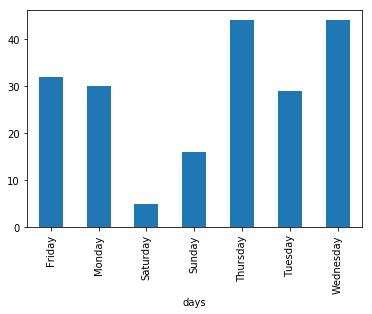

In [61]:
gun_freq.plot.bar(x='days', y='id')

## Source of Tweets

In [62]:
source_freq = df.groupby('source').count()['id']

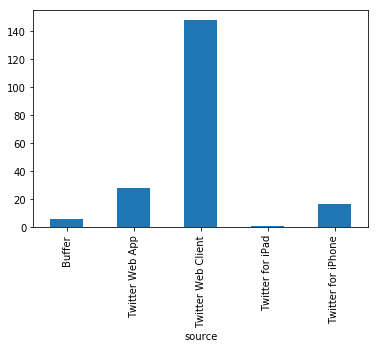

In [63]:
source_freq.plot.bar(x='source', y='id')

In [64]:
df.groupby('source').count()['id']

source
Buffer                  6
Twitter Web App        28
Twitter Web Client    148
Twitter for iPad        1
Twitter for iPhone     17
Name: id, dtype: int64

In [65]:
df.groupby(['source', 'tweet_hour','days'])[['tweet_hour']].count()

tweet_hour
source             tweet_hour days                 
Buffer             15         Thursday            1
                   16         Monday              1
                   17         Monday              1
                              Tuesday             1
                   20         Friday              1
...                                             ...
Twitter for iPhone 17         Wednesday           1
                   18         Wednesday           1
                   19         Thursday            1
                   20         Sunday              1
                              Tuesday             2

[107 rows x 1 columns]

## Followers and Friends Analysis

In [66]:
user = api.get_user(id = 'AndrewYNg', count= 10000)

In [67]:
friends = user.friends()
followers = user.followers()

In [68]:
def followers_df(follower):
    idler = [i.id for i in follower]
    df = pd.DataFrame(idler, columns=['id'])
    
    
    df['created_at'] = [i.created_at for i in follower]
    df['screen_name'] = [i.screen_name for i in follower]
    df['location'] = [i.location for i in follower]
    df['followers_count'] = [i.followers_count for i in follower]
    df['statuses_count'] = [i.statuses_count for i in follower]
    df['friends_count'] = [i.friends_count for i in follower]
    df['favourites_count'] = [i.favourites_count for i in follower]
    
    return df

In [69]:
df = followers_df(followers)

In [70]:
df.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
0,944813202818215936,2017-12-24 06:13:16,ZhengZhongjes,,2,0,10,0
1,1063735620,2013-01-05 19:02:04,nowedibles,Currently in Phoenix,143,1537,696,26312
2,42813709,2009-05-27 04:20:24,wrmntr,bangkok,65,25,15,5
3,2502971052,2014-05-18 01:18:16,BecDuane,New York City,52,45,186,22
4,1233272143669972992,2020-02-28 06:06:22,Geo50098532,,0,0,32,1


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
id                  20 non-null int64
created_at          20 non-null datetime64[ns]
screen_name         20 non-null object
location            20 non-null object
followers_count     20 non-null int64
statuses_count      20 non-null int64
friends_count       20 non-null int64
favourites_count    20 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 1.4+ KB


## Followers Segmentation

In [72]:
df.index = df['screen_name']

In [73]:
s_data = df[['followers_count', 'statuses_count']]

In [74]:
s_data

,followers_count,statuses_count
screen_name,,
ZhengZhongjes,2,0
nowedibles,143,1537
wrmntr,65,25
BecDuane,52,45
Geo50098532,0,0
PuneetMungali,3,1
TheHarshitGaur,48,102
AnttiHallavo,6,14
AshlarInnovati1,76,202


In [75]:
s_data['followers_count'] = s_data['followers_count'] +0.01

In [76]:
s_data['statuses_count'] = s_data['statuses_count'] +0.01

In [77]:
s_data

,followers_count,statuses_count
screen_name,,
ZhengZhongjes,2.01,0.01
nowedibles,143.01,1537.01
wrmntr,65.01,25.01
BecDuane,52.01,45.01
Geo50098532,0.01,0.01
PuneetMungali,3.01,1.01
TheHarshitGaur,48.01,102.01
AnttiHallavo,6.01,14.01
AshlarInnovati1,76.01,202.01


In [78]:
s_data = s_data.apply(lambda x:(x-min(x)) / (max(x)- min(x))) #doing standardization

In [79]:
s_data['followers_count'] = s_data['followers_count'] +0.01
s_data['statuses_count'] = s_data['statuses_count'] +0.01

In [80]:
s_data.head()

,followers_count,statuses_count
screen_name,,
ZhengZhongjes,0.011757,0.010000
nowedibles,0.135659,0.075064
wrmntr,0.067118,0.011058
BecDuane,0.055694,0.011905
Geo50098532,0.010000,0.010000


In [81]:
score = s_data['followers_count'] * s_data['statuses_count']

In [82]:
score

screen_name
ZhengZhongjes      0.000118
nowedibles         0.010183
wrmntr             0.000742
BecDuane           0.000663
Geo50098532        0.000100
PuneetMungali      0.000127
TheHarshitGaur     0.000747
AnttiHallavo       0.000162
AshlarInnovati1    0.001424
peterromero        0.000694
liu_jingdong       0.000100
blakkurrenr        0.001527
AllisonLilie       0.000469
rsmitawa           0.000146
saimanojbera       0.000310
TirathSBindra      0.000110
koncle             0.000123
07zhiping          0.000101
anuj63             0.001499
apbeaton           1.020100
dtype: float64

In [83]:
score.sort_values(ascending = False)

screen_name
apbeaton           1.020100
nowedibles         0.010183
blakkurrenr        0.001527
anuj63             0.001499
AshlarInnovati1    0.001424
TheHarshitGaur     0.000747
wrmntr             0.000742
peterromero        0.000694
BecDuane           0.000663
AllisonLilie       0.000469
saimanojbera       0.000310
AnttiHallavo       0.000162
rsmitawa           0.000146
PuneetMungali      0.000127
koncle             0.000123
ZhengZhongjes      0.000118
TirathSBindra      0.000110
07zhiping          0.000101
liu_jingdong       0.000100
Geo50098532        0.000100
dtype: float64

In [84]:
score[score>score.median() + score.std()/2].sort_values(ascending=False)

screen_name
apbeaton    1.0201
dtype: float64

In [85]:
score.median()

0.0003893627022069806

In [86]:
s_data['score'] =score

In [87]:
import numpy as np

In [88]:
s_data['segment'] = np.where(s_data['score'] >=score.median() + score.std()/len(score) , 'A', 'B')

In [89]:
s_data

,followers_count,statuses_count,score,segment
screen_name,,,,
ZhengZhongjes,0.011757,0.010000,0.000118,B
nowedibles,0.135659,0.075064,0.010183,B
wrmntr,0.067118,0.011058,0.000742,B
BecDuane,0.055694,0.011905,0.000663,B
Geo50098532,0.010000,0.010000,0.000100,B
PuneetMungali,0.012636,0.010042,0.000127,B
TheHarshitGaur,0.052179,0.014318,0.000747,B
AnttiHallavo,0.015272,0.010593,0.000162,B
AshlarInnovati1,0.076784,0.018551,0.001424,B


In [90]:
a = api.user_timeline(id= 'AndrewYNg',count=5)

In [91]:
for i in a:
    print(i.text)

Chatting with @lexfridman about ML, rise of MOOCs, what’s hard in learning AI, ... was the most fun interview I’ve… https://t.co/Kq3XDP30l1
Consumer internet companies with 1B+ users have popularized Big Data. But industries like manufacturing, agricultur… https://t.co/oBWEWaPU69
Happy multi-cultural palindrome day! Works whether your preferred date format is MM/DD/YYYY or DD/MM/YYYY or  YYYY/MM/DD.
Great chatting with @lexfridman. We talked about everything from the early mistakes I made building MOOCs to the ch… https://t.co/ksALj0InTq
Great having @EricTopol visit just now. His book Deep Medicine gives a compelling vision for AI in healthcare. We h… https://t.co/ylxKzpSNNM


In [92]:
def country_codes():
    places = api.trends_available()
    all_woeids = {place['name'].lower(): place['woeid'] for place in places}
    return all_woeids

In [93]:
# country_codes()

In [94]:
def country_woeid(country_name):
    country_name = country_name.lower()
    trends = api.trends_available()
    all_woeids = country_codes()
    return all_woeids[country_name]

In [95]:
country_woeid('turkey')

23424969

In [96]:
trends = api.trends_place(id= 23424969 )

In [97]:
import json
#print(json.dumps(trends, indent=1))

In [98]:
turkey = api.trends_place(id= 23424969 )
trends = turkey[0]['trends']

## Pull Data from Hashtag

In [99]:
tweets = api.search(q= '#datascience', lang='en',
                     result_type='recent', counts = 1000)

In [100]:
def hashtag_df(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list,columns=['id'])
    
    
    data_set['text'] = [tweet.text for tweet in results]
    data_set['created_at'] = [tweet.created_at for tweet in results]
    data_set['retweeted'] = [tweet.retweeted for tweet in results]
    data_set['retweet_count'] = [tweet.retweet_count for tweet in results]
    data_set['name'] = [tweet.author.name for tweet in results]
    data_set['user_screen_name'] = [tweet.author.screen_name for tweet in results]
    data_set['user_followers_count'] = [tweet.author.followers_count for tweet in results]
    data_set['user_location'] = [tweet.author.location for tweet in results]
    data_set['Hashtags'] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set

In [101]:
df = hashtag_df(tweets)

In [102]:
df.shape

(15, 10)

In [103]:
df

,id,text,created_at,retweeted,retweet_count,name,user_screen_name,user_followers_count,user_location,Hashtags
0,1233294134179454976,RT @amardeepkaushal: Deep Learning Chatbot: Ev...,2020-02-28 07:33:29,False,62,J-FACE,JFace4Ever,1313,"Charlotte, NC","[{'text': 'DigitalTransformation', 'indices': ..."
1,1233294108036345857,RT @amardeepkaushal: Deep Learning Chatbot: Ev...,2020-02-28 07:33:23,False,62,Ybeezydakid101,OfficalYBPage,1510,"Indianapolis, IN 46229","[{'text': 'DigitalTransformation', 'indices': ..."
2,1233294099849129984,And Now This: What are Machine Learning and D...,2020-02-28 07:33:21,False,0,Chuck Russell,cichuck,22827,"Harrisburg, PA","[{'text': 'tech', 'indices': [104, 109]}]"
3,1233294059088891905,RT @OracleAnalytics: How can you make #datasci...,2020-02-28 07:33:11,False,6,HubofMachineLearning,hubofml,1834,Germany,"[{'text': 'datascience', 'indices': [38, 50]}]"
4,1233294037127507968,RT @OracleAnalytics: How can you make #datasci...,2020-02-28 07:33:06,False,6,Gabriel Trauvitch,gtrauvit,165,"Athens, Greece","[{'text': 'datascience', 'indices': [38, 50]}]"
5,1233293836899713028,RT @gp_pulipaka: Best Paper Award at ICLR 2019...,2020-02-28 07:32:18,False,30,CyberSecurityBot 🤖,CyberSecCare,83,Matrix,"[{'text': 'BigData', 'indices': [48, 56]}, {'t..."
6,1233293823691743235,RT @gp_pulipaka: Best Paper Award at ICLR 2019...,2020-02-28 07:32:15,False,30,LinuxBot,LlnuxBot,1239,Raspberry Pi,"[{'text': 'BigData', 'indices': [48, 56]}, {'t..."
7,1233293822613999617,RT @amardeepkaushal: Deep Learning Chatbot: Ev...,2020-02-28 07:32:15,False,62,Red Bizzle,RedBizzle131,1272,"Tra Riverz, MI","[{'text': 'DigitalTransformation', 'indices': ..."
8,1233293788065476608,#AI #DataScience #ML #Robotics 📄 Machine Learn...,2020-02-28 07:32:07,False,0,Kevin Cooper,KevinCooperCEO,2334,,"[{'text': 'AI', 'indices': [0, 3]}, {'text': '..."
9,1233293714652618753,RT @amardeepkaushal: Deep Learning Chatbot: Ev...,2020-02-28 07:31:49,False,62,Brick,MrneedaBrick,839,"Atlanta, GA","[{'text': 'DigitalTransformation', 'indices': ..."


In [104]:
df['tweet_hour'] = df['created_at'].apply(lambda x: x.strftime('%H'))

In [105]:
df['tweet_hour'] = pd.to_numeric(df['tweet_hour'])

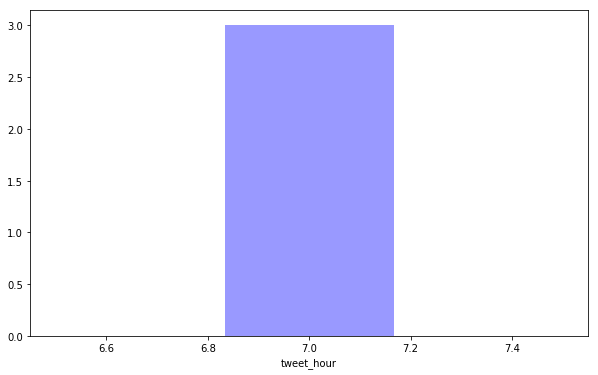

In [106]:
plt.figure(figsize=(10,6))
sns.distplot(df['tweet_hour'], kde=True, color='blue')

In [107]:
df['days'] = df['created_at'].dt.weekday_name

In [108]:
gun_freq = df.groupby('days').count()['id']

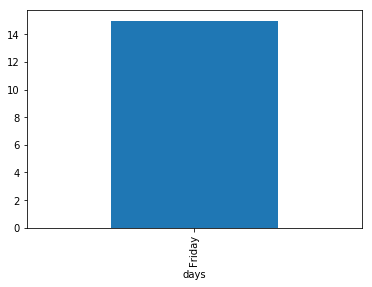

In [109]:
gun_freq.plot.bar(x='days', y='id')

# Twitter Text Mining

In [110]:

df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['text'] = df['text'].str.replace('[^\w\s]', '')

df['text'] = df['text'].str.replace('[\d]','')


import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()] ))

df['text'] = df['text'].str.replace('rt', '')

In [111]:
df.text

0      amardeepkaushal deep learning chatbot everyth...
1      amardeepkaushal deep learning chatbot everyth...
2     machine learning deep learning aificial intell...
3      oracleanalytics make datascience team effo co...
4      oracleanalytics make datascience team effo co...
5      gp_pulipaka best paper award iclr bigdata ana...
6      gp_pulipaka best paper award iclr bigdata ana...
7      amardeepkaushal deep learning chatbot everyth...
8     ai datascience ml robotics machine learning pa...
9      amardeepkaushal deep learning chatbot everyth...
10     amardeepkaushal deep learning chatbot everyth...
11     sklausdev machine learning encrypted data lon...
12     idalail data analytics sql newbs beginner mar...
13     gp_pulipaka best paper award iclr bigdata ana...
14     omkar_raii staup like synctactic democratisin...
Name: text, dtype: object

In [112]:
freq_df = df['text'].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [113]:
freq_df.columns = ['words', 'freqs']

In [114]:
freq_df.sort_values('freqs',ascending=False)

,words,freqs
12,,13.0
10,learning,11.0
7,ai,11.0
5,python,8.0
11,iot,8.0
...,...,...
51,sklausdev,1.0
52,longer,1.0
54,fantasy,1.0
55,encrypted,1.0


In [115]:
freq_df.shape

(79, 2)

In [116]:
a = freq_df[freq_df.freqs > freq_df.freqs.mean() + 
       freq_df.freqs.std()] # this code for the being more meaningful

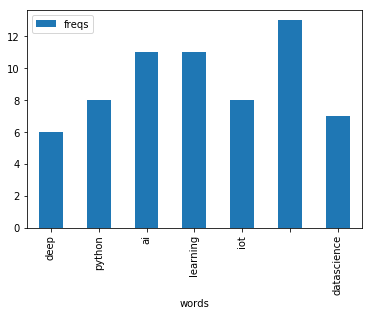

In [117]:
a.plot.bar(x= 'words', y= 'freqs')

## Word Cloud

In [118]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [119]:
text = " ".join(i for i in df.text)

In [120]:
text

' amardeepkaushal deep learning chatbot everything need know httpstcotulsfzcsk digitaltransformation python iot ai  amardeepkaushal deep learning chatbot everything need know httpstcotulsfzcsk digitaltransformation python iot ai machine learning deep learning aificial intelligence twcn tech news tech httpstcosoohtt  oracleanalytics make datascience team effo collaboratively building training deploying machine learning mode  oracleanalytics make datascience team effo collaboratively building training deploying machine learning mode  gp_pulipaka best paper award iclr bigdata analytics datascience ai machinelearning iot iiot pytorch python rstats  gp_pulipaka best paper award iclr bigdata analytics datascience ai machinelearning iot iiot pytorch python rstats  amardeepkaushal deep learning chatbot everything need know httpstcotulsfzcsk digitaltransformation python iot ai ai datascience ml robotics machine learning paper generative model dynamic linear flow link httpstcozgndwmod  amardeepk

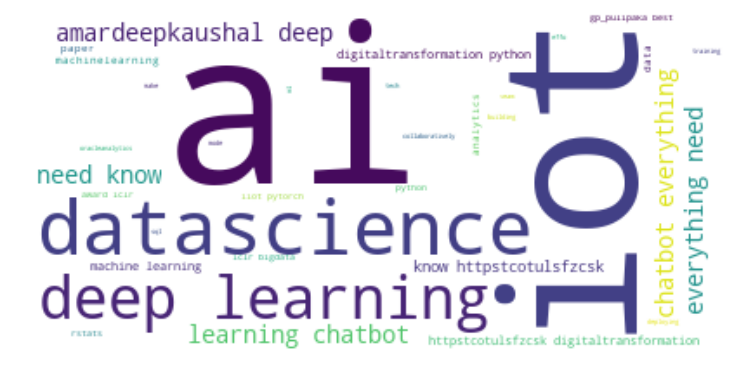

In [121]:
wc = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Twitter Sentiment

In [122]:
df

,id,text,created_at,retweeted,retweet_count,name,user_screen_name,user_followers_count,user_location,Hashtags,tweet_hour,days
0,1233294134179454976,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:33:29,False,62,J-FACE,JFace4Ever,1313,"Charlotte, NC","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday
1,1233294108036345857,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:33:23,False,62,Ybeezydakid101,OfficalYBPage,1510,"Indianapolis, IN 46229","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday
2,1233294099849129984,machine learning deep learning aificial intell...,2020-02-28 07:33:21,False,0,Chuck Russell,cichuck,22827,"Harrisburg, PA","[{'text': 'tech', 'indices': [104, 109]}]",7,Friday
3,1233294059088891905,oracleanalytics make datascience team effo co...,2020-02-28 07:33:11,False,6,HubofMachineLearning,hubofml,1834,Germany,"[{'text': 'datascience', 'indices': [38, 50]}]",7,Friday
4,1233294037127507968,oracleanalytics make datascience team effo co...,2020-02-28 07:33:06,False,6,Gabriel Trauvitch,gtrauvit,165,"Athens, Greece","[{'text': 'datascience', 'indices': [38, 50]}]",7,Friday
5,1233293836899713028,gp_pulipaka best paper award iclr bigdata ana...,2020-02-28 07:32:18,False,30,CyberSecurityBot 🤖,CyberSecCare,83,Matrix,"[{'text': 'BigData', 'indices': [48, 56]}, {'t...",7,Friday
6,1233293823691743235,gp_pulipaka best paper award iclr bigdata ana...,2020-02-28 07:32:15,False,30,LinuxBot,LlnuxBot,1239,Raspberry Pi,"[{'text': 'BigData', 'indices': [48, 56]}, {'t...",7,Friday
7,1233293822613999617,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:32:15,False,62,Red Bizzle,RedBizzle131,1272,"Tra Riverz, MI","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday
8,1233293788065476608,ai datascience ml robotics machine learning pa...,2020-02-28 07:32:07,False,0,Kevin Cooper,KevinCooperCEO,2334,,"[{'text': 'AI', 'indices': [0, 3]}, {'text': '...",7,Friday
9,1233293714652618753,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:31:49,False,62,Brick,MrneedaBrick,839,"Atlanta, GA","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday


In [123]:
from textblob import TextBlob

In [124]:
def sentiment_score(df):
    text = df['text']
    
    for i in range(0, len(text)):
        textB = TextBlob(text[i])
        sentiment_score = textB.sentiment.polarity
        df.set_value(i, 'sentiment_score', sentiment_score)
        
        
        if sentiment_score < 0.00:
            sentiment_class = 'Negative'
            df.set_value(i, 'sentiment_class', sentiment_class)
            
        elif sentiment_score > 0.00:
            sentiment_class ='Positive'
            df.set_value(i, 'sentiment_class', sentiment_class)
        else:
            sentiment_class = 'Notr'
            df.set_value(i, 'sentiment_class', sentiment_class)
    return df



In [125]:
sentiment_score(df)

,id,text,created_at,retweeted,retweet_count,name,user_screen_name,user_followers_count,user_location,Hashtags,tweet_hour,days,sentiment_score,sentiment_class
0,1233294134179454976,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:33:29,False,62,J-FACE,JFace4Ever,1313,"Charlotte, NC","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday,0.0,Notr
1,1233294108036345857,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:33:23,False,62,Ybeezydakid101,OfficalYBPage,1510,"Indianapolis, IN 46229","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday,0.0,Notr
2,1233294099849129984,machine learning deep learning aificial intell...,2020-02-28 07:33:21,False,0,Chuck Russell,cichuck,22827,"Harrisburg, PA","[{'text': 'tech', 'indices': [104, 109]}]",7,Friday,0.0,Notr
3,1233294059088891905,oracleanalytics make datascience team effo co...,2020-02-28 07:33:11,False,6,HubofMachineLearning,hubofml,1834,Germany,"[{'text': 'datascience', 'indices': [38, 50]}]",7,Friday,0.0,Notr
4,1233294037127507968,oracleanalytics make datascience team effo co...,2020-02-28 07:33:06,False,6,Gabriel Trauvitch,gtrauvit,165,"Athens, Greece","[{'text': 'datascience', 'indices': [38, 50]}]",7,Friday,0.0,Notr
5,1233293836899713028,gp_pulipaka best paper award iclr bigdata ana...,2020-02-28 07:32:18,False,30,CyberSecurityBot 🤖,CyberSecCare,83,Matrix,"[{'text': 'BigData', 'indices': [48, 56]}, {'t...",7,Friday,1.0,Positive
6,1233293823691743235,gp_pulipaka best paper award iclr bigdata ana...,2020-02-28 07:32:15,False,30,LinuxBot,LlnuxBot,1239,Raspberry Pi,"[{'text': 'BigData', 'indices': [48, 56]}, {'t...",7,Friday,1.0,Positive
7,1233293822613999617,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:32:15,False,62,Red Bizzle,RedBizzle131,1272,"Tra Riverz, MI","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday,0.0,Notr
8,1233293788065476608,ai datascience ml robotics machine learning pa...,2020-02-28 07:32:07,False,0,Kevin Cooper,KevinCooperCEO,2334,,"[{'text': 'AI', 'indices': [0, 3]}, {'text': '...",7,Friday,0.0,Notr
9,1233293714652618753,amardeepkaushal deep learning chatbot everyth...,2020-02-28 07:31:49,False,62,Brick,MrneedaBrick,839,"Atlanta, GA","[{'text': 'DigitalTransformation', 'indices': ...",7,Friday,0.0,Notr


In [126]:
df.groupby('sentiment_class').count()['id']

sentiment_class
Notr        12
Positive     3
Name: id, dtype: int64

In [127]:
sentiment_freq = df.groupby('sentiment_class').count()['id']

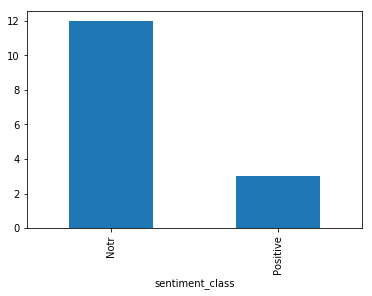

In [128]:
sentiment_freq.plot.bar(x= 'sentiment_class', y='id')

In [129]:
tweets = api.search(q = '#apple', lang='en', count=5000)

In [130]:
def hashtag_df(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list,columns=['id'])
    
    
    data_set['text'] = [tweet.text for tweet in results]
    data_set['created_at'] = [tweet.created_at for tweet in results]
    data_set['retweeted'] = [tweet.retweeted for tweet in results]
    data_set['retweet_count'] = [tweet.retweet_count for tweet in results]
    data_set['name'] = [tweet.author.name for tweet in results]
    data_set['user_screen_name'] = [tweet.author.screen_name for tweet in results]
    data_set['user_followers_count'] = [tweet.author.followers_count for tweet in results]
    data_set['user_location'] = [tweet.author.location for tweet in results]
    data_set['Hashtags'] = [tweet.entities.get('hashtags') for tweet in results]
    
    return data_set

In [131]:
df = hashtag_df(tweets)

In [132]:
df.shape

(100, 10)

In [133]:

df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['text'] = df['text'].str.replace('[^\w\s]', '')

df['text'] = df['text'].str.replace('[\d]','')


import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()] ))

df['text'] = df['text'].str.replace('rt', '')

In [134]:
def sentiment_score(df):
    text = df['text']
    
    for i in range(0, len(text)):
        textB = TextBlob(text[i])
        sentiment_score = textB.sentiment.polarity
        df.set_value(i, 'sentiment_score', sentiment_score)
        
        
        if sentiment_score < 0.00:
            sentiment_class = 'Negative'
            df.set_value(i, 'sentiment_class', sentiment_class)
            
        elif sentiment_score > 0.00:
            sentiment_class ='Positive'
            df.set_value(i, 'sentiment_class', sentiment_class)
        else:
            sentiment_class = 'Notr'
            df.set_value(i, 'sentiment_class', sentiment_class)
    return df

In [135]:
df = sentiment_score(df)

In [136]:
sentiment_freq = df.groupby('sentiment_class').count()['id']

In [137]:
sentiment_freq

sentiment_class
Negative    12
Notr        70
Positive    18
Name: id, dtype: int64

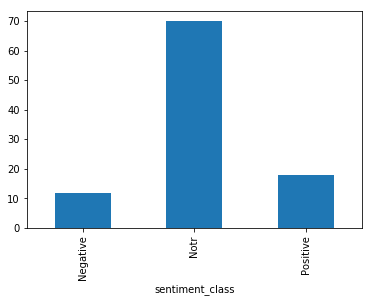

In [138]:
sentiment_freq.plot.bar(x = 'sentiment_class', y= 'id')

# Thus Text Minning On Tweets from Twitter  is Done and Processed